DATA LOADING

In [ ]:
# Load the dataset to inspect the contents before handling missing data.
import pandas as pd

# Load the uploaded file
file_path = 'C:\\Users\\omaim\\Downloads\\archive (1)\\employees.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and data
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


(  First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
 0    Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
 1     Thomas    Male  3/31/1996         6:53 AM   61933    4.170   
 2      Maria  Female  4/23/1993        11:17 AM  130590   11.858   
 3      Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
 4      Larry    Male  1/24/1998         4:47 PM  101004    1.389   
 
   Senior Management             Team  
 0              True        Marketing  
 1              True              NaN  
 2             False          Finance  
 3              True          Finance  
 4              True  Client Services  ,
 None)

IMPORT STATMENTS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score
from scipy.stats import mode
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
import joblib
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


DATA PRE-processing

In [ ]:
# Apply the preprocessing steps as requested by the user

# Fill missing values in "First Name" with "Unknown"
data['First Name'] = data['First Name'].fillna('Unknown')

# Fill missing values in "Gender" with the most common value (mode)
most_common_gender = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].fillna(most_common_gender)

# Fill missing values in "Senior Management" with False
data['Senior Management'] = data['Senior Management'].fillna(False)

# Fill missing values in "Team" with "Not Assigned"
data['Team'] = data['Team'].fillna('Not Assigned')

# Display the updated dataset to verify the changes
data.head(), data.isnull().sum()  # Show first few rows and check for any remaining missing values


C:\Users\omaim\AppData\Local\Temp\ipykernel_16732\4203306801.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Senior Management'] = data['Senior Management'].fillna(False)


(  First Name  Gender Start Date Last Login Time  Salary  Bonus %  \
 0    Douglas    Male   8/6/1993        12:42 PM   97308    6.945   
 1     Thomas    Male  3/31/1996         6:53 AM   61933    4.170   
 2      Maria  Female  4/23/1993        11:17 AM  130590   11.858   
 3      Jerry    Male   3/4/2005         1:00 PM  138705    9.340   
 4      Larry    Male  1/24/1998         4:47 PM  101004    1.389   
 
    Senior Management             Team  
 0               True        Marketing  
 1               True     Not Assigned  
 2              False          Finance  
 3               True          Finance  
 4               True  Client Services  ,
 First Name           0
 Gender               0
 Start Date           0
 Last Login Time      0
 Salary               0
 Bonus %              0
 Senior Management    0
 Team                 0
 dtype: int64)

In [ ]:
# تحويل الأعمدة لتواريخ
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
data['Last Login Time'] = pd.to_datetime(data['Last Login Time'], errors='coerce')
data['Last Login Time'] = pd.to_datetime(data['Last Login Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# عرض البيانات للتحقق
print(data[['Start Date', 'Last Login Time']].head())


  Start Date     Last Login Time
0 1993-08-06 2024-12-29 12:42:00
1 1996-03-31 2024-12-29 06:53:00
2 1993-04-23 2024-12-29 11:17:00
3 2005-03-04 2024-12-29 13:00:00
4 1998-01-24 2024-12-29 16:47:00


C:\Users\omaim\AppData\Local\Temp\ipykernel_16732\3164160683.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Last Login Time'] = pd.to_datetime(data['Last Login Time'], errors='coerce')


In [ ]:
print(data.isnull().sum())

First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


In [ ]:

# تدرج البيانات
scaler = MinMaxScaler()
data[['Salary', 'Bonus %']] = scaler.fit_transform(data[['Salary', 'Bonus %']])

# عرض البيانات بعد التدرج
print(data[['Salary', 'Bonus %']].head())


     Salary   Bonus %
0  0.542191  0.313276
1  0.234301  0.166675
2  0.831864  0.572825
3  0.902494  0.439801
4  0.574359  0.019758


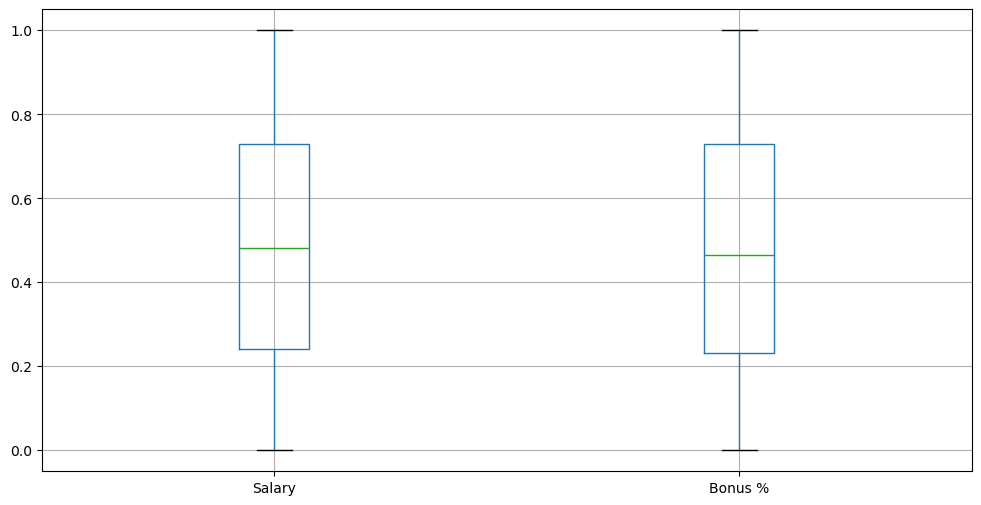

In [ ]:

# رسم الصندوق لتحديد القيم المتطرفة
plt.figure(figsize=(12, 6))
data[['Salary', 'Bonus %']].boxplot()
plt.show()


In [ ]:
# تحقق من القيم الفريدة
print(data['Gender'].unique())
print(data['Team'].unique())


['Male' 'Female']
['Marketing' 'Not Assigned' 'Finance' 'Client Services' 'Legal' 'Product'
 'Engineering' 'Business Development' 'Human Resources' 'Sales'
 'Distribution']


In [ ]:

# ترميز البيانات
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Team'] = label_encoder.fit_transform(data['Team'])
data['Senior Management'] = label_encoder.fit_transform(data['Senior Management'])


In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [ ]:
# إزالة التكرارات
data = data.drop_duplicates()

In [ ]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         1000 non-null   object        
 1   Gender             1000 non-null   int32         
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   datetime64[ns]
 4   Salary             1000 non-null   float64       
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  1000 non-null   int64         
 7   Team               1000 non-null   int32         
dtypes: datetime64[ns](2), float64(2), int32(2), int64(1), object(1)
memory usage: 54.8+ KB


(  First Name  Gender Start Date     Last Login Time    Salary   Bonus %  \
 0    Douglas       1 1993-08-06 2024-12-29 12:42:00  0.542191  0.313276   
 1     Thomas       1 1996-03-31 2024-12-29 06:53:00  0.234301  0.166675   
 2      Maria       0 1993-04-23 2024-12-29 11:17:00  0.831864  0.572825   
 3      Jerry       1 2005-03-04 2024-12-29 13:00:00  0.902494  0.439801   
 4      Larry       1 1998-01-24 2024-12-29 16:47:00  0.574359  0.019758   
 
    Senior Management  Team  
 0                  1     7  
 1                  1     8  
 2                  0     4  
 3                  1     4  
 4                  1     1  ,
 None)

In [ ]:
# إنشاء ميزة مدة التوظيف
data['Employment Duration'] = (pd.Timestamp.now() - data['Start Date']).dt.days

In [ ]:

# ألتاكد من عدم وجود قيم ناتجة عن إدخال خاطئ أو غير منطقية مثل إدخال "#####" في عمود "Salary"
invalid_salary_entries = data[~data['Salary'].apply(lambda x: isinstance(x, (int, float)))]
print(invalid_salary_entries)

# تحقق من الأعمدة النصية مثل Gender و First Name للتأكد من إدخال صحيح
invalid_text_entries = data[(data['First Name'] == 'Unknown') | (data['Gender'] == 'N/A')]
print(invalid_text_entries)


Empty DataFrame
Columns: [First Name, Gender, Start Date, Last Login Time, Salary, Bonus %, Senior Management, Team, Employment Duration]
Index: []
    First Name  Gender Start Date     Last Login Time    Salary   Bonus %  \
7      Unknown       0 2015-07-20 2024-12-29 10:43:00  0.094808  0.559089   
23     Unknown       1 2012-06-14 2024-12-29 16:19:00  0.790104  0.212742   
25     Unknown       1 2012-10-08 2024-12-29 01:12:00  0.017956  0.927730   
32     Unknown       1 1998-08-21 2024-12-29 14:27:00  0.760059  0.285382   
39     Unknown       1 2016-01-29 2024-12-29 02:33:00  0.758606  0.358286   
..         ...     ...        ...                 ...       ...       ...   
902    Unknown       1 2001-05-23 2024-12-29 19:52:00  0.599365  0.280363   
925    Unknown       0 2000-08-23 2024-12-29 16:19:00  0.529640  0.970627   
946    Unknown       0 1985-09-15 2024-12-29 01:50:00  0.856948  0.841355   
947    Unknown       1 2012-07-30 2024-12-29 15:07:00  0.629601  0.227904   
951  

In [ ]:
#يعرض DataFrame فارغ، مما يعني أنه لا توجد قيم غير منطقية في عمود "Salary".
#يعرض DataFrame يحتوي على الصفوف التي تحتوي على "Unknown" في عمود "First Name" أو "N/A" في عمود "Gender".
# لكننا لن نهتم بها لانها لن تكون ميزات مهمة للتجميع

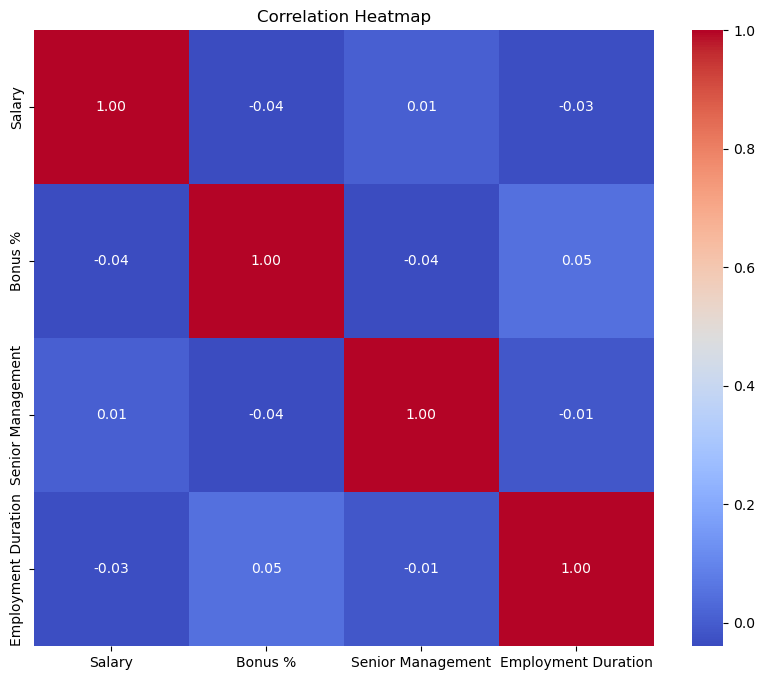

In [ ]:
# تحديد الأعمدة العددية فقط
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# حساب مصفوفة الارتباط
correlation_matrix = numeric_data.corr()

# رسم الخريطة الحرارية
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()



الارتباطات بين المتغيرات هي كما يلي:
- الراتب (Salary) مع نسبة المكافأة (Bonus %): -0.04
- الراتب (Salary) مع الإدارة العليا (Senior Management): 0.01
- الراتب (Salary) مع مدة التوظيف (Employment Duration): -0.03
- نسبة المكافأة (Bonus %) مع الإدارة العليا (Senior Management): -0.04
- نسبة المكافأة (Bonus %) مع مدة التوظيف (Employment Duration): 0.05
- الإدارة العليا (Senior Management) مع مدة التوظيف (Employment Duration): -0.01
 المتغيرات الأربعة تبدو مستقلة نسبيًا عن بعضها البعض، أي أن أحدها لا يؤثر بشكل كبير على الآخر.

In [ ]:
correlation_matrix = data[['Gender', 'Salary', 'Bonus %', 'Senior Management', 'Team']].corr()
print(correlation_matrix)


                     Gender    Salary   Bonus %  Senior Management      Team
Gender             1.000000  0.013518  0.023644          -0.005807  0.031778
Salary             0.013518  1.000000 -0.036381           0.007780 -0.000121
Bonus %            0.023644 -0.036381  1.000000          -0.039574 -0.018732
Senior Management -0.005807  0.007780 -0.039574           1.000000 -0.004460
Team               0.031778 -0.000121 -0.018732          -0.004460  1.000000


In [ ]:
correlation_matrix = data[['Gender', 'Salary', 'Bonus %', 'Senior Management', 'Employment Duration']].corr()
print(correlation_matrix)


                       Gender    Salary   Bonus %  Senior Management  \
Gender               1.000000  0.013518  0.023644          -0.005807   
Salary               0.013518  1.000000 -0.036381           0.007780   
Bonus %              0.023644 -0.036381  1.000000          -0.039574   
Senior Management   -0.005807  0.007780 -0.039574           1.000000   
Employment Duration -0.067783 -0.033476  0.049242          -0.011295   

                     Employment Duration  
Gender                         -0.067783  
Salary                         -0.033476  
Bonus %                         0.049242  
Senior Management              -0.011295  
Employment Duration             1.000000  


C:\Users\omaim\AppData\Local\Temp\ipykernel_16732\3901777437.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='muted')


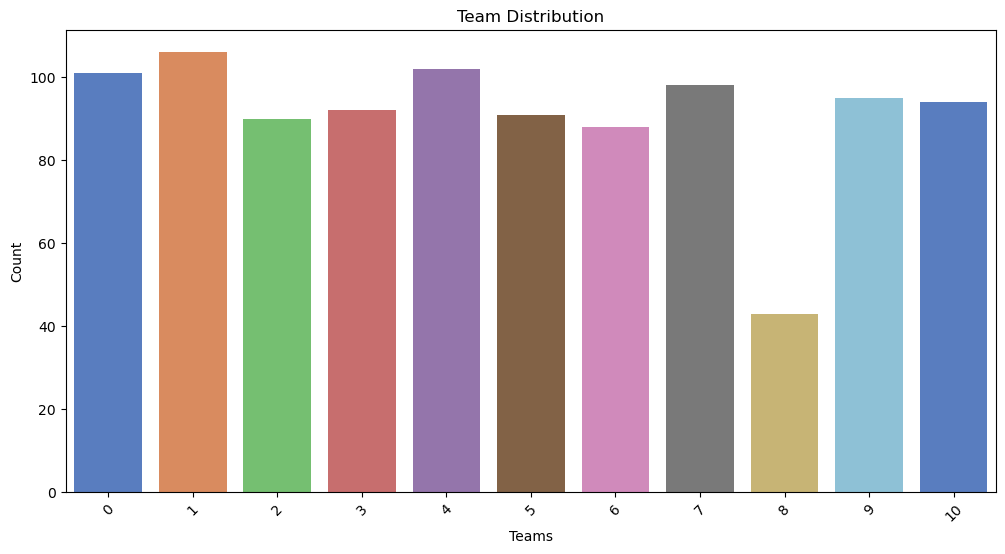

In [ ]:
# توزيع القيم في عمود معين
value_counts = data['Team'].value_counts()

# رسم مخطط الأعمدة
plt.figure(figsize=(12, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='muted')
plt.title('Team Distribution')
plt.xlabel('Teams')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


DATA SELECTION

In [ ]:

# Display current columns to decide what to drop
print("Columns before dropping redundant features:")
print(data.columns)

# Drop irrelevant features
columns_to_drop = ['First Name', 'Last Login Time']
data = data.drop(columns=columns_to_drop, axis=1)

# Confirm the changes
print("Columns after dropping redundant features:")
print(data.columns)


Columns before dropping redundant features:
Index(['First Name', 'Gender', 'Start Date', 'Last Login Time', 'Salary',
       'Bonus %', 'Senior Management', 'Team', 'Employment Duration'],
      dtype='object')
Columns after dropping redundant features:
Index(['Gender', 'Start Date', 'Salary', 'Bonus %', 'Senior Management',
       'Team', 'Employment Duration'],
      dtype='object')


In [ ]:
# في هذه المرحلة لم اكن متاكدة مما اذا كانت ميزات مثل الجنس والفريق مهمة ام لا لذلك لم اقم بحذفها هنا
#بعض الأعمدة مثل Gender قد تُسبب تحيزًا غير مرغوب فيه في النموذج إذا لم تكن مرتبطة بالمشكلة.


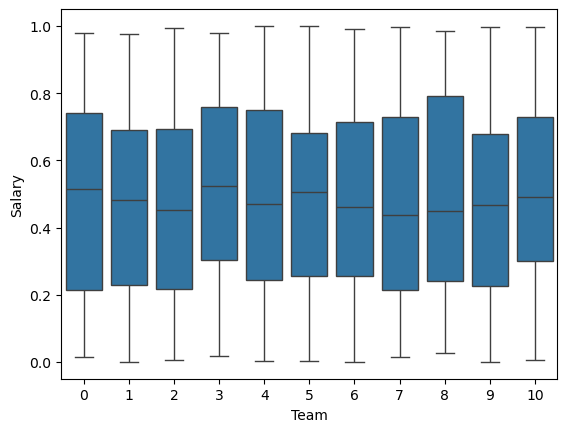

In [ ]:

# رسم العلاقة بين العمود والمتغير المستهدف
sns.boxplot(x=data['Team'], y=data['Salary'])
plt.show()


MODEL CREATION

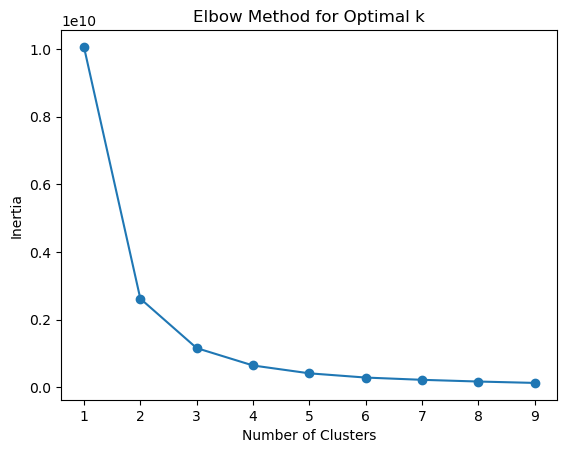

Validation Silhouette Score: 0.60
Test Silhouette Score: 0.59


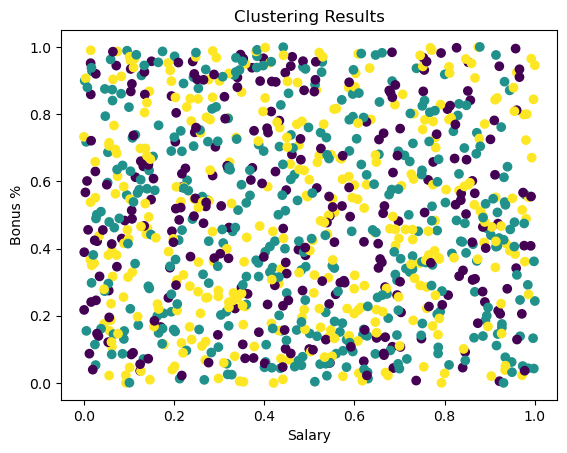

In [ ]:


# اختيار الميزات ذات الصلة للتجميع
features = data[['Salary', 'Bonus %', 'Senior Management', 'Employment Duration']]

# تقسيم البيانات إلى تدريب واختبار
train_features, temp_features = train_test_split(features, test_size=0.3, random_state=42)

# تقسيم مجموعة التحقق والاختبار
val_features, test_features = train_test_split(temp_features, test_size=0.5, random_state=42)

# تطبيق طريقة الكوع لتحديد العدد الأمثل للتجمعات
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# بعد تحديد العدد الأمثل للتجمعات (افترض أنه k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_features)

# التحقق من أداء النموذج على مجموعة التحقق
val_clusters = kmeans.predict(val_features)
val_score = silhouette_score(val_features, val_clusters)
print(f'Validation Silhouette Score: {val_score:.2f}')

# تقييم النموذج على مجموعة الاختبار
test_clusters = kmeans.predict(test_features)
test_score = silhouette_score(test_features, test_clusters)
print(f'Test Silhouette Score: {test_score:.2f}')

# إضافة تسميات التجمع إلى DataFrame الأصلي للتصوير
clusters=kmeans.predict(features)
data['Performance Cluster'] = clusters

# تصوير نتائج التجميع
plt.scatter(data['Salary'], data['Bonus %'], c=data['Performance Cluster'], cmap='viridis')
plt.xlabel('Salary')
plt.ylabel('Bonus %')
plt.title('Clustering Results')
plt.show()


استنادا إلى الرسم البياني لطريقة الكوع ، فإن العدد الأمثل للمجموعات هو 3.
 هناك "كوع" ملحوظ عند
k = 3 ، مما يشير إلى أن القصور الذاتي ينخفض بشكل كبير حتى هذه النقطة ثم ينخفض المستوى.
يشير هذا إلى أن ثلاث مجموعات هي الخيار الأفضل

In [ ]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)


In [ ]:
#ايجاد دقة النموذج على بيانات التدريب

features = data[['Salary', 'Bonus %', 'Senior Management', 'Employment Duration']]

# تحجيم الميزات
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
# تقسيم البيانات إلى تدريب واختبار
train_features, temp_features = train_test_split(scaled_features, test_size=0.3, random_state=42)

# تقسيم مجموعة التحقق والاختبار
val_features, test_features = train_test_split(temp_features, test_size=0.5, random_state=42)
# بعد تحديد العدد الأمثل للتجمعات (افترض أنه k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(train_features)
# حساب Silhouette Score على بيانات التدريب
train_labels = kmeans.predict(train_features)
train_score = silhouette_score(train_features, train_labels)
print(f'Training Silhouette Score: {train_score:.2f}')


Training Silhouette Score: 0.35


In [ ]:

#معرفة جودة استخدام البيانات بعد التطبيع
# تطبيق النماذج الفردية
# 1. K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_features)

# 2. DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)

# 3. Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(scaled_features)

# 4. دمج التسميات
# تحويل جميع التسميات إلى قائمة
all_labels = np.array([kmeans_labels, dbscan_labels, agg_labels])

# 5. استخدام Majority Voting للحصول على التسميات النهائية
final_labels, _ = mode(all_labels, axis=0)

# 6. طباعة التسميات النهائية
final_labels = final_labels.flatten()  # تحويل النتائج إلى مصفوفة ذات بعد واحد
print("Final Ensemble Labels:", final_labels)

# 7. تقييم النموذج النهائي باستخدام Silhouette Score
if len(set(final_labels)) > 1:  # التأكد من وجود أكثر من مجموعة واحدة
    silhouette_ensemble = silhouette_score(scaled_features, final_labels)
    print(f"Silhouette Score (Ensemble): {silhouette_ensemble}")
else:
    print("Ensemble Clustering produced only one cluster.")


Final Ensemble Labels: [0 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 2 0 1 0 0 0 2 1 1 2 2 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 1 0 1 2 2 1 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 2 0 0 1 0 0 0 0 2 0 1 0 0 1 1 0 0 0 1 2 0 1 0 1 1 1 2 0 1 2
 0 0 0 0 1 1 1 0 2 1 2 0 0 0 2 0 0 0 0 0 1 1 0 0 0 1 2 0 1 1 0 0 0 1 0 1 0
 0 0 1 1 0 0 0 0 1 2 0 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 2 0 0 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 0 0 0 0 1 1 1 2 0 0 0 2 1 2 1 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 1 1 2
 0 0 1 0 0 0 1 2 2 0 1 0 0 1 0 0 0 1 1 2 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1
 0 0 0 0 0 2 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 2 1 2 0 1 1 0 0 0 2 0 0 0
 1 0 2 0 0 2 0 0 0 2 0 0 0 0 1 1 0 1 2 0 1 0 1 1 0 0 0 0 0 0 2 1 1 0 0 1 2
 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 2 0 0 1 0 1 0 0 0 0 0 1 2 0 0 0 0 0 2 1 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 2 0 0 0 1 0 1 2 2 0 2 2 1 0 2 1 0 0 0 0 1 2 1 1 1 0 1 0 2 0 2
 0

هذه القيمة تمثل نتيجة النماذج الثلاثة معا
Silhouette Score (Ensemble): 0.2219229063173543
وهي ضعيفة بسبب نموذج DBSCAN بشكل اساسي

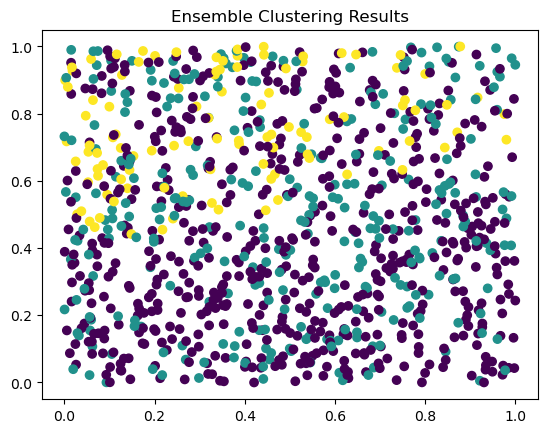

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=final_labels, cmap='viridis')
plt.title("Ensemble Clustering Results")
plt.show()


In [ ]:
# حساب توزيع النقاط في التجمعات
cluster_distribution = pd.Series(data['Performance Cluster']).value_counts()
print("Cluster Distribution:")
print(cluster_distribution)


Cluster Distribution:
Performance Cluster
1    375
2    357
0    268
Name: count, dtype: int64


Distribution of Performance Categories:
Performance Cluster
1    375
2    357
0    268
Name: count, dtype: int64


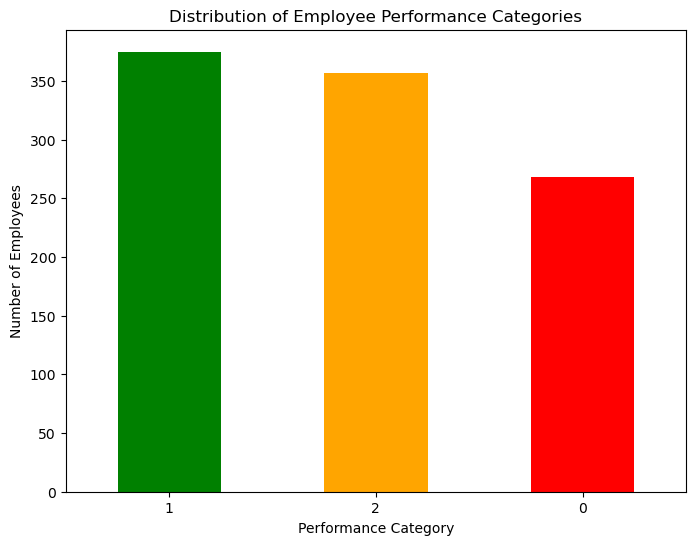

In [ ]:

# عرض توزيع الفئات الثلاث
category_counts = data['Performance Cluster'].value_counts()

# طباعة عدد الموظفين في كل فئة
print("Distribution of Performance Categories:")
print(category_counts)

# رسم المخطط البياني
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribution of Employee Performance Categories")
plt.xlabel("Performance Category")
plt.ylabel("Number of Employees")
plt.xticks(rotation=0)
plt.show()


0: "low Performers"
1: "Moderate Performers"
2: "high Performers"


Percentage Distribution of Performance Categories:
Performance Cluster
1    37.5
2    35.7
0    26.8
Name: count, dtype: float64


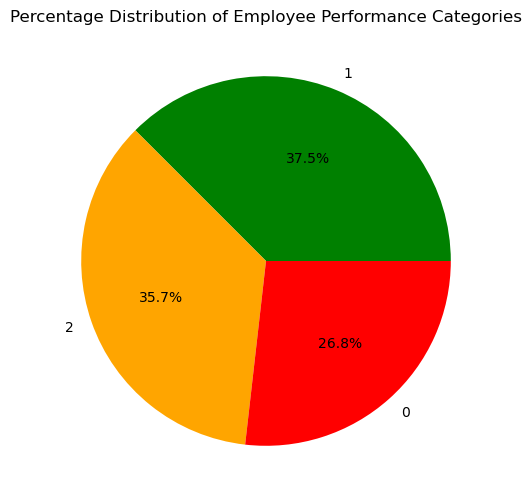

In [ ]:
# حساب النسب المئوية لكل فئة
category_percentages = (category_counts / len(data)) * 100

# عرض النسب المئوية لكل فئة
print("\nPercentage Distribution of Performance Categories:")
print(category_percentages)

# رسم مخطط دائري لتوزيع الفئات
plt.figure(figsize=(8, 6))
category_percentages.plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Percentage Distribution of Employee Performance Categories")
plt.ylabel("")  # إزالة عنوان المحور y
plt.show()


In [ ]:
# تحديد الفئة الأكبر ومقارنتها بالباقي
max_category = category_counts.idxmax()
max_percentage = category_percentages[max_category]

print(f"\nThe largest category is '{max_category}' with {max_percentage:.2f}% of employees.")
if max_percentage > 50:
    print("Warning: One category dominates the classification, consider revising the criteria.")
else:
    print("The classification appears balanced.")



The largest category is '1' with 37.50% of employees.
The classification appears balanced.


In [ ]:

# حساب المسافات داخل التجمعات
intra_cluster_distance = cdist(train_features, kmeans.cluster_centers_[kmeans.labels_], metric='euclidean')
mean_intra_distance = np.mean(intra_cluster_distance)
print(f"Mean Intra-Cluster Distance: {mean_intra_distance:.2f}")


Mean Intra-Cluster Distance: 0.82


 أن التجمعات ليست شديدة التقارب، لكنها ليست متباعدة بشكل مفرط.


# حساب الـ Silhouette لكل نقطة
sample_silhouette_values = silhouette_samples(val_features, val_clusters)

# إضافة درجات Silhouette إلى DataFrame للتحليل
val_features['Silhouette Score'] = sample_silhouette_values
print(val_features.groupby(val_clusters)['Silhouette Score'].mean())
# 0=>0.692526
# 1=>0.593132
# 2=>0.527636

تقييم جودة التجمعات: درجة Silhouette تعطي فكرة عن كيفية توزيع النقاط داخل التجمعات. درجة Silhouette العالية (قريبة من 1) تشير إلى أن النقاط متجمعة بشكل جيد حول مركز التجمع الخاص بها وبعيدة عن التجمعات الأخرى.

0: "low Performers"
1: "Moderate Performers"
2: "high Performers"

In [ ]:
# حساب مؤشر Davies-Bouldin على بيانات التحقق
davies_bouldin_val = davies_bouldin_score(val_features, val_clusters)
print(f'Validation Davies-Bouldin Index: {davies_bouldin_val:.2f}')

# حساب مؤشر Davies-Bouldin على بيانات الاختبار
davies_bouldin_test = davies_bouldin_score(test_features, test_clusters)
print(f'Test Davies-Bouldin Index: {davies_bouldin_test:.2f}')


Validation Davies-Bouldin Index: 3.79
Test Davies-Bouldin Index: 3.55


# تحليل الأداء مقابل عدد التجمعات


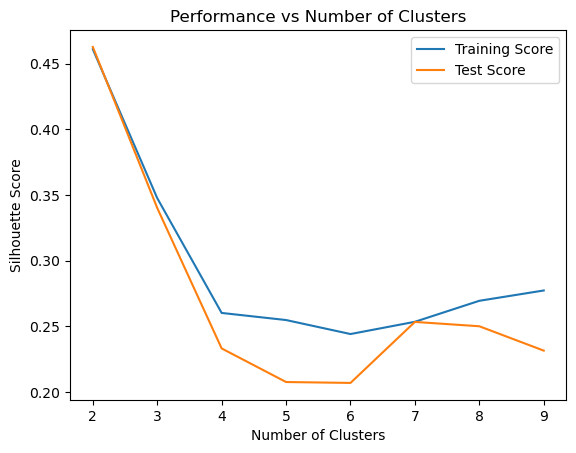

In [ ]:
k_values = range(2, 10)
train_scores = []
test_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_features)
    train_scores.append(silhouette_score(train_features, kmeans.predict(train_features)))
    test_scores.append(silhouette_score(test_features, kmeans.predict(test_features)))

plt.plot(k_values, train_scores, label='Training Score')
plt.plot(k_values, test_scores, label='Test Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.title('Performance vs Number of Clusters')
plt.show()


 يساعد في ضبط عدد العناقيد المثالي لتحسين جودة النموذج. بعد تحديد العدد الأمثل، يمكنك استخدامه في تطبيق النموذج على بيانات جديدة للتنبؤ بالعناقيد.


In [ ]:
# تأكد من تطبيع البيانات
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[['Salary', 'Bonus %', 'Employment Duration']])
print("Shape of features before scaling:", data[['Salary', 'Bonus %', 'Employment Duration']].shape)
print("Shape of labels or other data:", test_features.shape)  # استبدل labels ببياناتك الأخرى

# تأكد من تطابق البيانات المستخدمة
features = data[['Salary', 'Bonus %', 'Employment Duration']][:700]  # تأكد من الحجم المناسب
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

# تأكد من أن عدد الأعمدة والأسماء يتطابقان
cluster_centers = kmeans.cluster_centers_
columns = ['Salary', 'Bonus', 'Employment Duration'][:cluster_centers.shape[1]]


Shape of features before scaling: (1000, 3)
Shape of labels or other data: (150, 4)


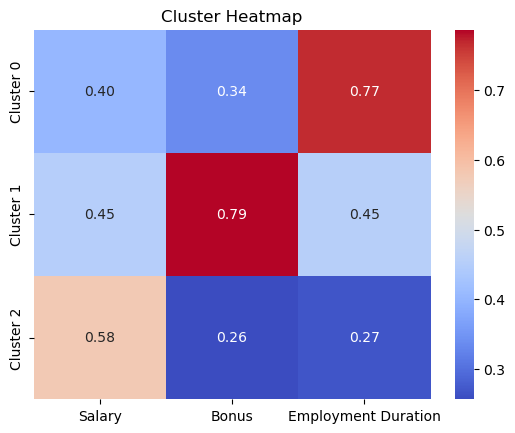

In [ ]:

# إنشاء DataFrame للعرض
centroids_df = pd.DataFrame(cluster_centers, columns=columns)
sns.heatmap(centroids_df, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=centroids_df.columns,
            yticklabels=[f"Cluster {i}" for i in range(len(centroids_df))])
plt.title("Cluster Heatmap")
plt.show()




مثال على البيانات:
الخريطة الحرارية تُظهر القيم المركزية للميزات الثلاثة لكل مجموعة:

Cluster 0:

Salary: 0.40

Bonus: 0.34

Employment Duration: 0.77

Cluster 1:

Salary: 0.45

Bonus: 0.79

Employment Duration: 0.45

Cluster 2:

Salary: 0.58

Bonus: 0.26

Employment Duration: 0.27

In [ ]:
data_df = pd.DataFrame(data, columns=columns)

# Add cluster labels
data_df['Cluster'] = clusters

# Save to CSV
data_df.to_csv("clustered_employeess.csv", index=False)
print("Dataset with clusters saved as 'clustered_employees.csv'")


Dataset with clusters saved as 'clustered_employees.csv'


In [ ]:

# الخطوة 1: تقليل الأبعاد باستخدام PCA
pca = PCA(n_components=2)  # تقليل الأبعاد إلى اثنين
reduced_features = pca.fit_transform(scaled_features)

# الخطوة 2: تدريب النماذج على البيانات الجديدة
# نموذج K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_features)

# نموذج Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(reduced_features)

# الخطوة 3: تنفيذ Ensemble Clustering
all_labels = np.vstack([kmeans_labels, agg_labels])
final_labels = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=all_labels)

# حساب Silhouette Score على البيانات المخفضة الأبعاد
ensemble_silhouette = silhouette_score(reduced_features, final_labels)
print("Final Ensemble Labels:", final_labels)
print("Silhouette Score (Ensemble):", ensemble_silhouette)


Final Ensemble Labels: [0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0
 1

تقليل الأبعاد: لتسهيل التحليل والتصور.

تدريب النماذج: لاستخدام أكثر من نموذج تجميع لزيادة دقة التصنيف.

Ensemble Clustering: لتحسين أداء التجميع من خلال دمج نتائج عدة نماذج.

حساب Silhouette Score: لتقييم جودة التجميع النهائي.

Silhouette Score (Ensemble): قيمة 0.27 تقريبًا، تشير إلى أن التجميع لا يزال بحاجة إلى تحسين ولكنه يعكس بعض التمايز بين المجموعات.

In [ ]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_features)
print("DBSCAN Cluster Labels:", dbscan_labels)

# Agglomerative Clustering
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clust.fit_predict(scaled_features)
print("Agglomerative Clustering Labels:", agg_labels)


DBSCAN Cluster Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0

نلاحظ لاي مدى الخوارزمية DBSCAN غير مناسبة تمامًا لهذه البيانات

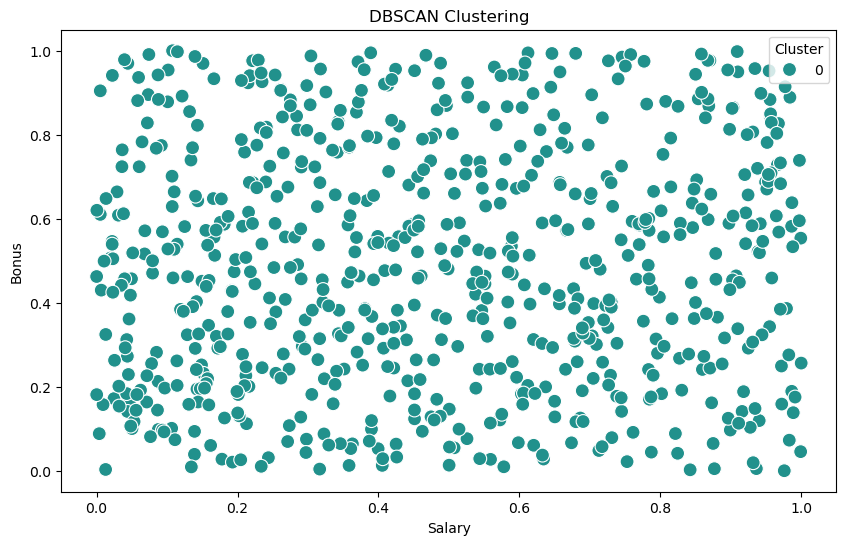

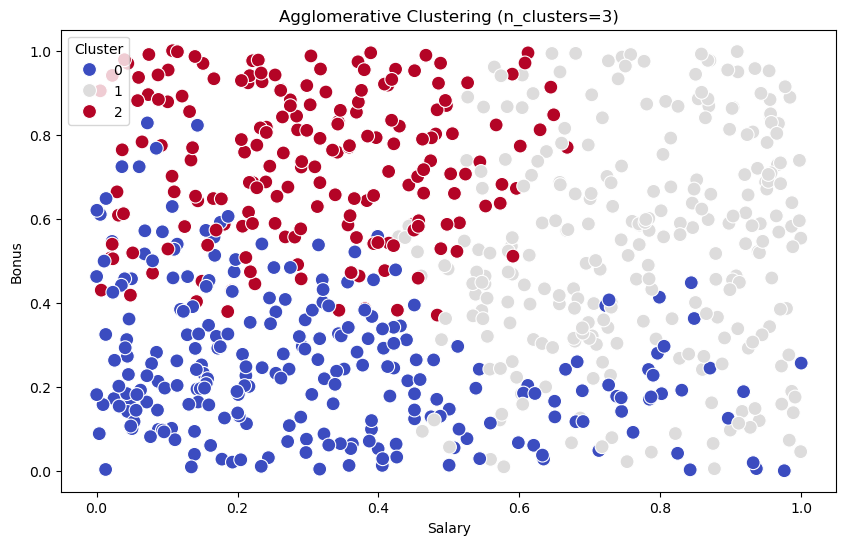


DBSCAN Evaluation:
  Silhouette Score: N/A
  Davies-Bouldin Index: N/A
  Calinski-Harabasz Index: N/A

Agglomerative Clustering Evaluation:
  Silhouette Score: 0.21
  Davies-Bouldin Index: 1.49
  Calinski-Harabasz Index: 199.59


In [ ]:

# DBSCAN clustering

dbscan = DBSCAN(eps=0.3, min_samples=3)  # جرب قيمًا أصغر لـ eps و min_samples
dbscan_labels = dbscan.fit_predict(scaled_features)

# Visualize DBSCAN clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=dbscan_labels, palette='viridis', s=100)
plt.title('DBSCAN Clustering')
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.legend(title='Cluster')
plt.show()

# Evaluate DBSCAN
if len(set(dbscan_labels)) > 1 and -1 not in set(dbscan_labels):  # Ensure valid clusters
    silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)
    dbi_dbscan = davies_bouldin_score(scaled_features, dbscan_labels)
    chi_dbscan = calinski_harabasz_score(scaled_features, dbscan_labels)
else:
    silhouette_dbscan = "N/A"
    dbi_dbscan = "N/A"
    chi_dbscan = "N/A"

# Agglomerative clustering
num_clusters = 3
agg = AgglomerativeClustering(n_clusters=num_clusters)
agg_labels = agg.fit_predict(scaled_features)

# Visualize Agglomerative clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 1], y=scaled_features[:, 2], hue=agg_labels, palette='coolwarm', s=100, legend="full")
plt.title(f'Agglomerative Clustering (n_clusters={num_clusters})')
plt.xlabel('Salary')
plt.ylabel('Bonus')
plt.legend(title='Cluster')
plt.show()

# Evaluate Agglomerative clustering
silhouette_agg = silhouette_score(scaled_features, agg_labels)
dbi_agg = davies_bouldin_score(scaled_features, agg_labels)
chi_agg = calinski_harabasz_score(scaled_features, agg_labels)

# Print evaluation metrics
print("\nDBSCAN Evaluation:")
print(f"  Silhouette Score: {silhouette_dbscan}")
print(f"  Davies-Bouldin Index: {dbi_dbscan}")
print(f"  Calinski-Harabasz Index: {chi_dbscan}")

print("\nAgglomerative Clustering Evaluation:")
print(f"  Silhouette Score: {silhouette_agg:.2f}")
print(f"  Davies-Bouldin Index: {dbi_agg:.2f}")
print(f"  Calinski-Harabasz Index: {chi_agg:.2f}")


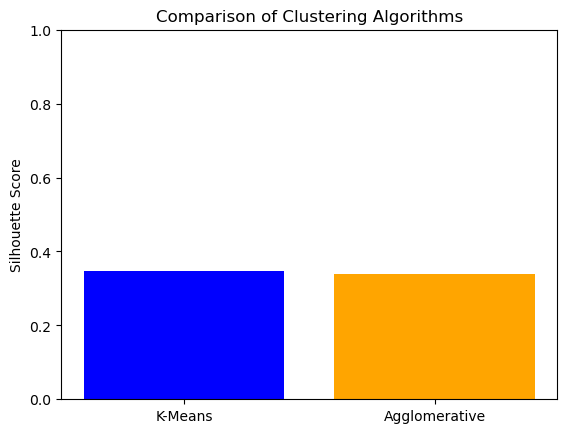

Silhouette Scores:
K-Means: 0.35
Agglomerative: 0.34


In [ ]:

num_clusters = 3

# K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(train_features)
kmeans_score = silhouette_score(train_features, kmeans_labels)

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=num_clusters)
agglo_labels = agglo.fit_predict(train_features)
agglo_score = silhouette_score(train_features, agglo_labels)

# رسم النتائج
methods = ['K-Means', 'Agglomerative']
scores = [kmeans_score, agglo_score]

plt.bar(methods, scores, color=['blue', 'orange'])
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Algorithms')
plt.ylim(0, 1)  # نطاق الدرجات
plt.show()

# طباعة النتائج
print("Silhouette Scores:")
print(f"K-Means: {kmeans_score:.2f}")
print(f"Agglomerative: {agglo_score:.2f}")


## Cluster Interpretation

Performance Cluster: يعبر عن التجمعات الناتجة من نموذج K-Means (القيم الأصلية للأرقام الناتجة عن النموذج).
Cluster Label: تسميات وصفية تُضاف لجعل نتائج التجمعات أكثر وضوحًا للمستخدم

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Gender               1000 non-null   int32         
 1   Start Date           1000 non-null   datetime64[ns]
 2   Salary               1000 non-null   float64       
 3   Bonus %              1000 non-null   float64       
 4   Senior Management    1000 non-null   int64         
 5   Team                 1000 non-null   int32         
 6   Employment Duration  1000 non-null   int64         
 7   Performance Cluster  1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2)
memory usage: 50.9 KB


In [ ]:
#only k-means output

# Map clusters to meaningful labels
cluster_labels = {0: "low Performers", 1: "Moderate Performers", 2: "high Performers"}
data['Cluster Label'] = data['Performance Cluster'].map(cluster_labels)

# Display results
data.head(10)


,Gender,Start Date,Salary,Bonus %,Senior Management,Team,Employment Duration,Performance Cluster,Cluster Label
0,1,1993-08-06,0.542191,0.313276,1,7,11468,2,high Performers
1,1,1996-03-31,0.234301,0.166675,1,8,10500,2,high Performers
2,0,1993-04-23,0.831864,0.572825,0,4,11573,2,high Performers
3,1,2005-03-04,0.902494,0.439801,1,4,7240,1,Moderate Performers
4,1,1998-01-24,0.574359,0.019758,1,1,9836,2,high Performers
5,1,1987-04-18,0.697593,0.481272,0,6,13770,0,low Performers
6,0,1987-08-17,0.265138,0.475302,1,9,13649,0,low Performers
7,0,2015-07-20,0.094808,0.559089,0,4,3450,1,Moderate Performers
8,0,2005-11-22,0.527064,0.924930,1,3,6977,1,Moderate Performers
9,0,2002-08-08,0.912477,0.343864,1,0,8179,2,high Performers


In [ ]:
# عرض مجموعة من البيانات مع التسميات الجديدة
data[['Start Date', 'Salary', 'Bonus %', 'Performance Cluster', 'Cluster Label']].head(20)


,Start Date,Salary,Bonus %,Performance Cluster,Cluster Label
0,1993-08-06,0.542191,0.313276,2,high Performers
1,1996-03-31,0.234301,0.166675,2,high Performers
2,1993-04-23,0.831864,0.572825,2,high Performers
3,2005-03-04,0.902494,0.439801,1,Moderate Performers
4,1998-01-24,0.574359,0.019758,2,high Performers
5,1987-04-18,0.697593,0.481272,0,low Performers
6,1987-08-17,0.265138,0.475302,0,low Performers
7,2015-07-20,0.094808,0.559089,1,Moderate Performers
8,2005-11-22,0.527064,0.924930,1,Moderate Performers
9,2002-08-08,0.912477,0.343864,2,high Performers


#  addition


In [ ]:
# حفظ النموذج
joblib.dump(kmeans, 'final_model.pkl')

# تحميل النموذج عند الحاجة
loaded_model = joblib.load('final_model.pkl')


عند حفظ النموذج، لن نحتاج إلى إعادة تدريبه في كل مرة نريد استخدامه. هذا يقلل من استهلاك الوقت والطاقة الحاسوبية.
إذا اردت دمج النموذج مع تطبيق حقيقي (مثل واجهة ويب أو تطبيق هاتف محمول)، يمكنك ببساطة تحميل النموذج الجاهز بدلاً من تدريبه أثناء تشغيل التطبيق.
يمكنك تحميل النموذج واستخدامه على بيانات جديدة لتوقع أو تصنيف النتائج.